In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('smsspamcollection.csv')
#df = pd.read_csv('spam.csv')

In [6]:
df.sample(5)

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
3038,ham,You are not bothering me but you have to trust...
4814,ham,Ummmmmaah Many many happy returns of d day my ...
1373,spam,"Bears Pic Nick, and Tom, Pete and ... Dick. In..."
1078,ham,Convey my regards to him
2661,ham,Do you know when dad will be back?


In [7]:
df.shape

(5571, 2)

In [8]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   ham                                                                                                              5571 non-null   object
 1   Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# drop last 3 cols
#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.sample(5)

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
5509,ham,I went to project centre
5342,ham,No go. No openings for that room 'til after th...
3816,ham,How long does it take to get it.
4648,ham,We are okay. Going to sleep now. Later
5298,ham,Well good morning mr . Hows london treatin' ya...


In [12]:
# renaming the cols
#df.rename(columns={'v1':'target','v2':'text'},inplace=True)
#df.sample(5)

df.rename(columns={'ham':'target','Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...':'text'},inplace=True)
df.sample(5)

,target,text
998,ham,Then ü wait 4 me at bus stop aft ur lect lar. ...
4486,ham,have * good weekend.
1405,ham,K..k..any special today?
2186,ham,So is there anything specific I should be doin...
3703,ham,How is my boy? No sweet words left for me this...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [16]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [17]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [18]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.shape

(5168, 2)

## 2.EDA

In [21]:
df.head()

,target,text
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [22]:
df['target'].value_counts()

,count
target,
0,4515
1,653


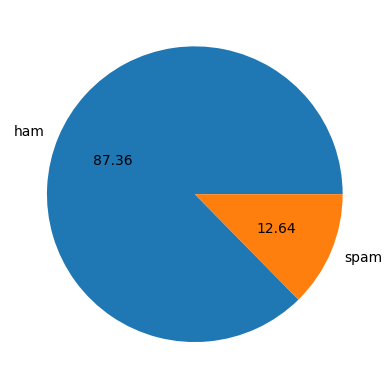

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
# Data is imbalanced

In [25]:
import nltk

In [26]:
!pip install nltk

In [27]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
 df['num_characters'] = df['text'].apply(len)

In [29]:
df.head()

,target,text,num_characters
0,0,Ok lar... Joking wif u oni...,29
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,0,U dun say so early hor... U c already then say...,49
3,0,"Nah I don't think he goes to usf, he lives aro...",61
4,1,FreeMsg Hey there darling it's been 3 week's n...,147


In [30]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,Ok lar... Joking wif u oni...,29,8
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
2,0,U dun say so early hor... U c already then say...,49,13
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39


In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Ok lar... Joking wif u oni...,29,8,2
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
2,0,U dun say so early hor... U c already then say...,49,13,1
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,79.338429,18.610294,1.974652
std,58.441452,13.420613,1.460245
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.250000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4515.000000,4515.000000,4515.000000
mean,70.897010,17.286157,1.828350
std,56.718188,13.609761,1.395922
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.765697,2.986217
std,29.821348,6.992892,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

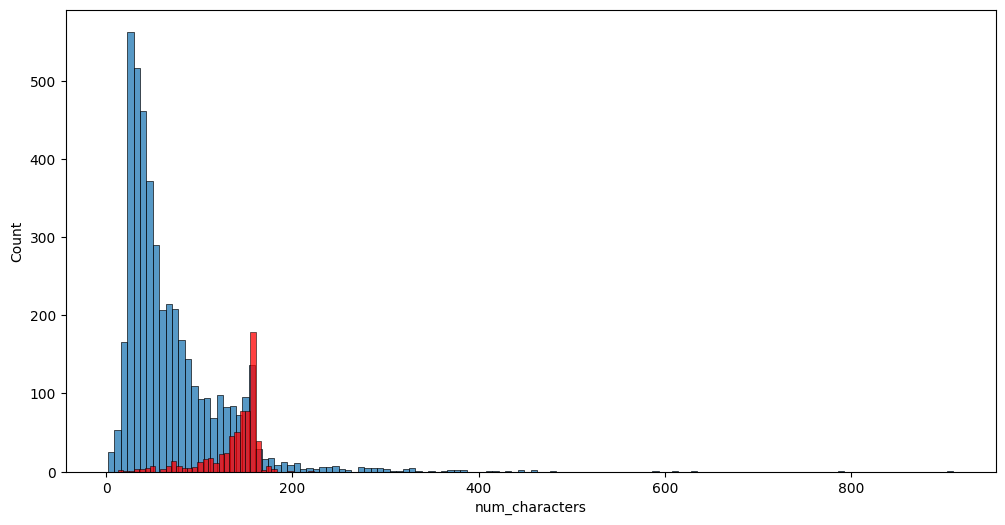

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

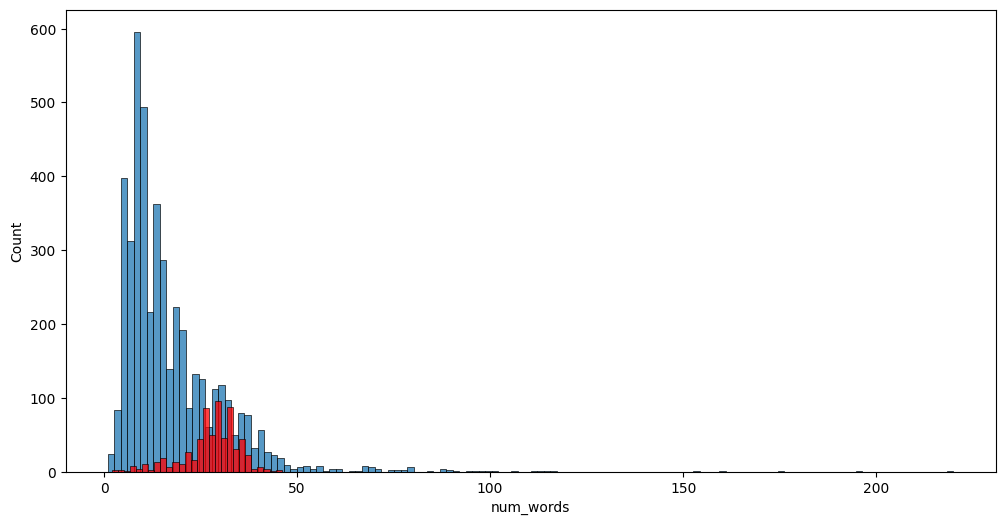

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

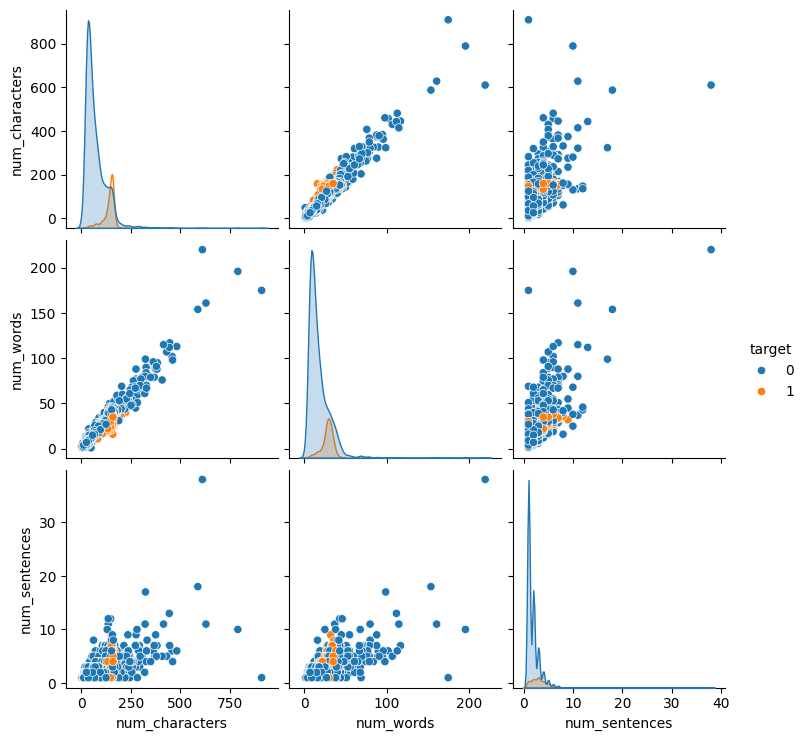

In [40]:
sns.pairplot(df,hue='target')

<Axes: >

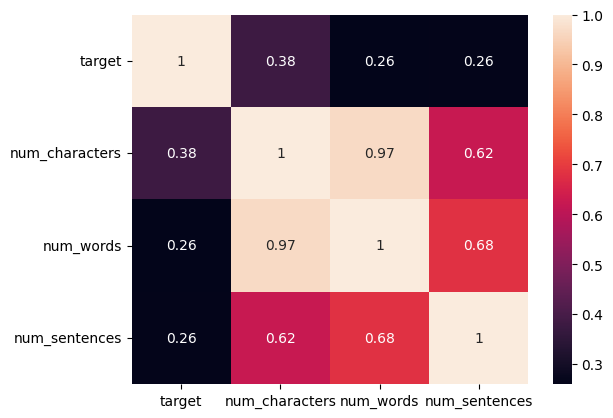

In [41]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [46]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [47]:
df['text'][0]

'Ok lar... Joking wif u oni...'

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [49]:
df['transformed_text'] = df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


In [51]:
!pip install wordcloud

In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [53]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

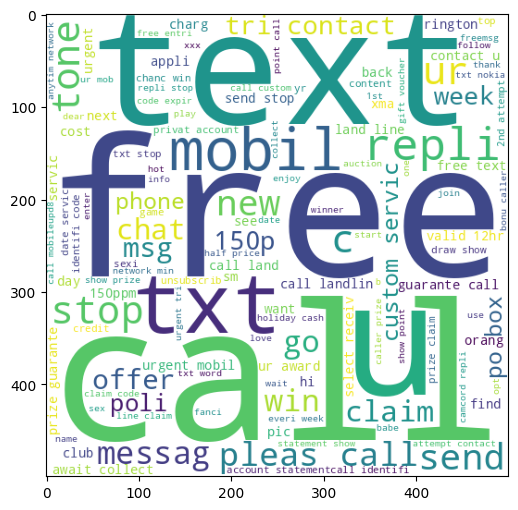

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [55]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

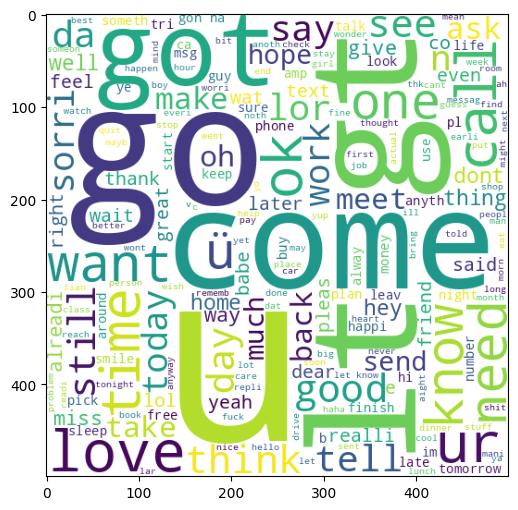

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


In [58]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [59]:
len(spam_corpus)

9983

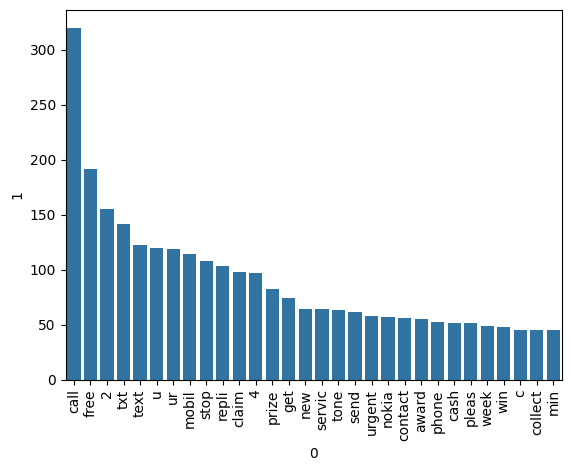

In [60]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

35939

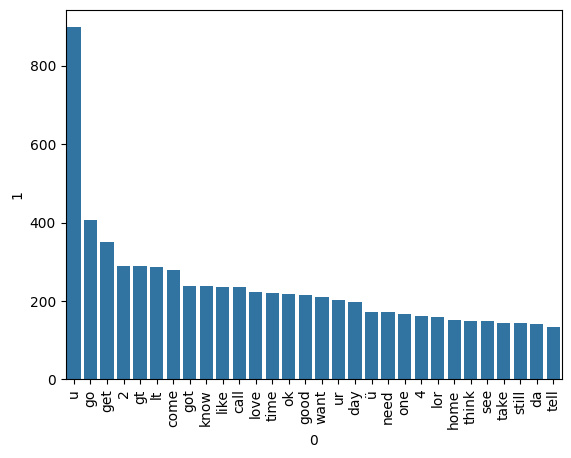

In [63]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


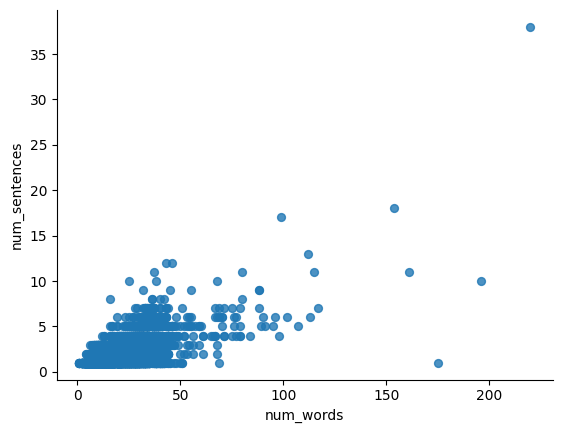

In [65]:
# @title num_words vs num_sentences

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='num_words', y='num_sentences', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

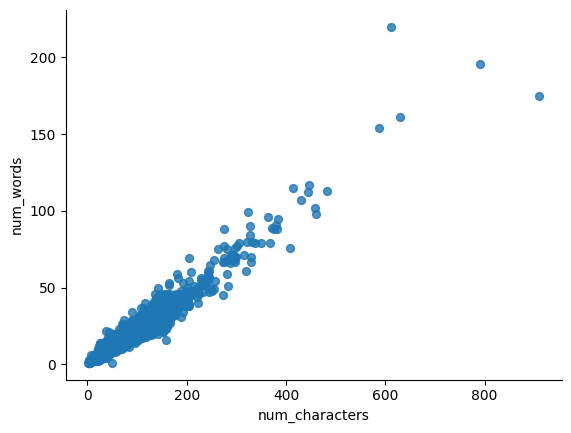

In [66]:
# @title num_characters vs num_words

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='num_characters', y='num_words', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## 4. Model Building

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [68]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [70]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [71]:
X.shape

(5168, 3000)

In [72]:
y = df['target'].values

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 111]
 [ 23 112]]
0.5022421524663677


In [78]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[898   1]
 [ 30 105]]
0.9905660377358491


In [79]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[898   1]
 [ 17 118]]
0.9915966386554622


In [80]:
# tfidf --> MNB

In [81]:
!pip install xgboost

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#import XGBClassifier

In [83]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [84]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [85]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [86]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9827586206896551)

In [87]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9827586206896551
For  KN
Accuracy -  0.9129593810444874
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  0.9905660377358491
For  DT
Accuracy -  0.9390715667311412
Precision -  0.839622641509434
For  LR
Accuracy -  0.9535783365570599
Precision -  0.9578947368421052
For  RF
Accuracy -  0.9748549323017408
Precision -  0.990990990990991
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.8968253968253969
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9666666666666667
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9550561797752809
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9565217391304348


In [88]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [89]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912959,1.000000
5,RF,0.974855,0.990991
2,NB,0.970019,0.990566
0,SVC,0.977756,0.982759
8,ETC,0.977756,0.966667
4,LR,0.953578,0.957895
10,xgb,0.970986,0.956522
9,GBDT,0.947776,0.955056
7,BgC,0.966151,0.896825
3,DT,0.939072,0.839623


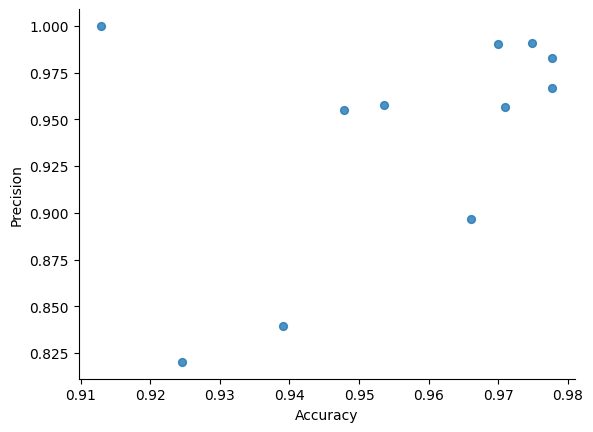

In [90]:
# @title Accuracy vs Precision

from matplotlib import pyplot as plt
performance_df.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [91]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [92]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912959
1,RF,Accuracy,0.974855
2,NB,Accuracy,0.970019
3,SVC,Accuracy,0.977756
4,ETC,Accuracy,0.977756
5,LR,Accuracy,0.953578
6,xgb,Accuracy,0.970986
7,GBDT,Accuracy,0.947776
8,BgC,Accuracy,0.966151
9,DT,Accuracy,0.939072


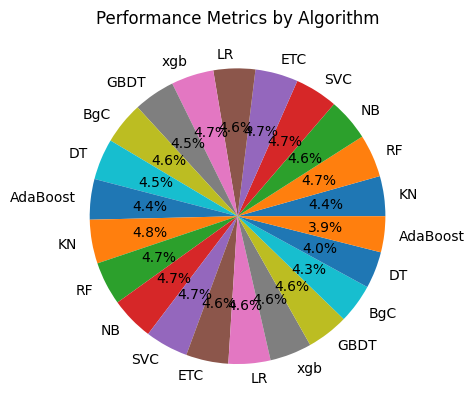

In [93]:
# prompt: visualize the performance_df1 with pie chart

import matplotlib.pyplot as plt
plt.pie(performance_df1['value'], labels=performance_df1['Algorithm'], autopct='%1.1f%%')
plt.title('Performance Metrics by Algorithm')
plt.show()

/tmp/ipython-input-94-2326188885.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(performance_df1, x='value', y='variable', inner='stick', palette='Dark2')


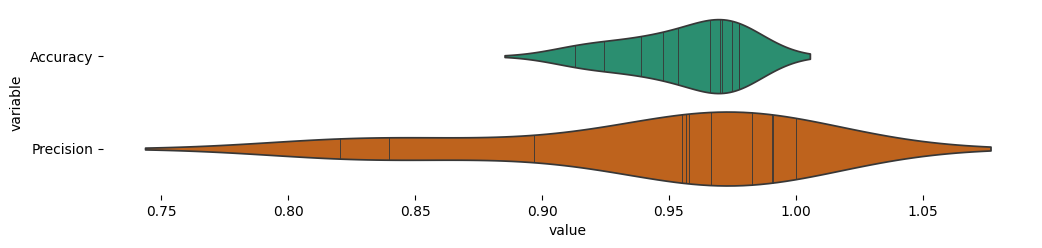

In [94]:
# @title variable vs value

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_df1['variable'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_df1, x='value', y='variable', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=performance_df1)

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
mnb.fit(X_train,y_train)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install lime

In [ ]:
from lime.lime_text import LimeTextExplainer
class_names=['0','1']
explainer = LimeTextExplainer(class_names=class_names)
idx = 30

# Create a wrapper function that vectorizes the input text before prediction
def predict_proba_wrapper(texts):
  transformed_texts = tfidf.transform(texts)
  return mnb.predict_proba(transformed_texts)

exp = explainer.explain_instance(df.text[idx], predict_proba_wrapper, num_features=6)
print('Document id: %d' % idx)
print('Probability=', mnb.predict_proba(tfidf.transform([df.text[idx]]))[0,1])
print('True class: %s' % df.target[idx])
exp.as_list()

In [ ]:
# prompt: visualize the lime result

exp.as_pyplot_figure()
plt.tight_layout()
plt.show()


In [ ]:
# prompt: Visualize the Lime result in a different way

from lime.lime_text import LimeTextExplainer

# Assuming 'tfidf' and 'mnb' are already trained and available
# Assuming 'df' with 'text' and 'target' columns exists

class_names = ['ham', 'spam'] # Use the actual class names

explainer = LimeTextExplainer(class_names=class_names)

idx_to_explain = 30 # Choose the index of the sample to explain

# Create a wrapper function that vectorizes the input text before prediction
def predict_proba_wrapper(texts):
  transformed_texts = tfidf.transform(texts)
  return mnb.predict_proba(transformed_texts)

# Generate the explanation
exp = explainer.explain_instance(df.text[idx_to_explain],
                                 predict_proba_wrapper,
                                 num_features=10) # Increase num_features for more words

print(f'Document id: {idx_to_explain}')
print(f'Original Text: {df.text[idx_to_explain]}')
print(f'Probability of Spam: {mnb.predict_proba(tfidf.transform([df.text[idx_to_explain]]))[0,1]:.4f}')
print(f'True class: {"spam" if df.target[idx_to_explain] == 1 else "ham"}')

# Get the explanation as a list of (word, weight) tuples
explanation_list = exp.as_list()
print("\nExplanation (Word, Weight):")
for word, weight in explanation_list:
    print(f"  {word}: {weight:.4f}")

# Alternative visualization using a horizontal bar plot
words = [item[0] for item in explanation_list]
weights = [item[1] for item in explanation_list]

# Sort by weight for better visualization
sorted_indices = np.argsort(weights)
words = [words[i] for i in sorted_indices]
weights = [weights[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(words, weights, color=['red' if w < 0 else 'green' for w in weights])
plt.xlabel("Weight (Impact on Prediction)")
plt.title(f"LIME Explanation for Document {idx_to_explain}")
plt.tight_layout()
plt.show()

# Another visualization: WordCloud with LIME weights
# You might need to adjust the font size based on the weights

def color_func(word, **kwargs):
    try:
        # Find the weight for the word in the explanation
        weight = next((w for w, text in explanation_list if text == word), 0)
        # Define color based on weight (green for positive, red for negative)
        if weight > 0:
            # Scale opacity based on absolute weight (higher weight = more opaque)
            opacity = min(1.0, abs(weight) * 5)  # Adjust scaling factor as needed
            return f"rgba(0, 128, 0, {opacity})" # Green
        elif weight < 0:
            opacity = min(1.0, abs(weight) * 5) # Adjust scaling factor as needed
            return f"rgba(255, 0, 0, {opacity})" # Red
        else:
            return "black" # Words not in explanation are black
    except:
        return "black"

wordcloud_lime = WordCloud(width=800, height=400, background_color='white',
                           color_func=color_func, max_words=50).generate_from_frequencies(dict(explanation_list))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_lime, interpolation='bilinear')
plt.axis("off")
plt.title(f"LIME WordCloud for Document {idx_to_explain}")
plt.show()


In [ ]:
!pip install shap
import shap

In [ ]:
# prompt: SHAP is installed already. Implement SHAP

import shap

# Assuming 'mnb' and 'X_test' are already trained and available

# Create a callable function for SHAP that takes transformed data
def predict_proba_shap(transformed_texts):
  return mnb.predict_proba(transformed_texts)

# Create a SHAP explainer
# Use the trained Multinomial Naive Bayes model's predict_proba function
# and the transformed training data as the background
explainer = shap.Explainer(predict_proba_shap, X_train)

# Calculate SHAP values for a sample from the test set
# Choose an index from the test set to explain
idx_to_explain = 0 # Example: explain the first sample in the test set

# Ensure the index is within the bounds of the test set
if idx_to_explain >= len(X_test):
    print(f"Index {idx_to_explain} is out of bounds for the test set.")
else:
    # Reshape the single test sample to a 2D array
    test_sample_2d = X_test[idx_to_explain].reshape(1, -1)

    # Calculate SHAP values for the selected test sample
    # Set max_evals to at least 2 * num_features + 1 for the Permutation explainer
    shap_values = explainer(test_sample_2d, max_evals=2 * X_train.shape[1] + 1)

    # To get the feature names for better interpretation (requires the TF-IDF vectorizer)
    feature_names = tfidf.get_feature_names_out()

    # Create a SHAP Explanation object for the specific sample and class
    # Access the explanation for the first sample and the spam class (index 1)
    # Include the feature names and the base value (expected value) for this explainer
    explanation = shap.Explanation(values=shap_values.values[0, :, 1],
                                  base_values=shap_values.base_values[0, 1],
                                  data=test_sample_2d[0], # Original data point
                                  feature_names=feature_names)


    # Visualize the SHAP explanation using the Explanation object
    shap.initjs()
    shap.plots.waterfall(explanation)

    # Summary plot for the entire test set (can take time)
    # shap_values_test = explainer(X_test, max_evals=2 * X_train.shape[1] + 1)
    # shap.summary_plot(shap_values_test[:,:,1], X_test, feature_names=feature_names) # Also access spam class for summary plot

In [ ]:
# prompt: Install and Import ELI5

!pip install eli5
import eli5

In [ ]:
# prompt: As ELI5 imported, USE ELI5 provide word importance.

import eli5

# Explain the prediction for a specific sample
# Choose an index from the test set (using the row index of df_test)
idx_to_explain_eli5 = 0 # Example: explain the first sample in the test_df

# Ensure the index is within the bounds of the test set DataFrame
if idx_to_explain_eli5 < len(df_test):
    # Get the transformed text directly from df_test
    transformed_text_sample = df_test['transformed_text'].iloc[idx_to_explain_eli5]

    # Display the explanation using eli5.show_weights (explains model weights)
    # This doesn't need a specific sample text
    print("ELI5 Explanation (Model Weights):")
    display(eli5.show_weights(mnb, vec=tfidf, feature_names=tfidf.get_feature_names_out(), target_names=class_names))

    # Explain a specific prediction using eli5.show_prediction
    # This requires the original text of the sample
    original_text_sample = df_test['text'].iloc[idx_to_explain_eli5]
    print("\nELI5 Explanation for a specific prediction:")
    display(eli5.show_prediction(mnb,
                               original_text_sample, # Pass the original text
                               vec=tfidf,
                               target_names=class_names))
else:
    print(f"Index {idx_to_explain_eli5} is out of bounds for the test set DataFrame.")